In [ ]:
!pip install ktrain --upgrade

## Train Yelp Model

In [1]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from joblib import dump, load
import numpy as np


In [ ]:
%%time
yelp = pd.read_json('https://storage.googleapis.com/msca-bdp-data-open/yelp/yelp_train_sentiment.json', 
                  orient='records', lines=True) 

CPU times: user 1.59 s, sys: 752 ms, total: 2.34 s
Wall time: 3.18 s


In [ ]:
import tensorflow as tf
print('TensorFlow Version: ' + tf.__version__)

TensorFlow Version: 2.8.2


In [4]:
import ktrain
from ktrain import text
ts = text.TransformerSummarizer()

print('Ktrain Version: ' + ktrain.__version__)

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Ktrain Version: 0.31.2


#### Interpreting results
label = 0 >> Negative Sentiment  
label = 1 >> Positive Sentiment  

In [ ]:
# define X and y
X = yelp['text']
y = yelp['label']
print(X.shape)
print(y.shape)

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(255717,)
(255717,)
(191787,)
(63930,)
(191787,)
(63930,)


In [ ]:
pipe_svm = make_pipeline(
    CountVectorizer(lowercase=False, stop_words='english', ngram_range=(1,3)),
    SGDClassifier(max_iter=100, tol=None)
)

In [ ]:
%time pipe_svm.fit(X_train, y_train)

CPU times: user 2min 31s, sys: 3.87 s, total: 2min 35s
Wall time: 2min 34s


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(lowercase=False, ngram_range=(1, 3),
                                 stop_words='english')),
                ('sgdclassifier', SGDClassifier(max_iter=100, tol=None))])

In [ ]:
y_pred = pipe_svm.predict(X_test)

In [ ]:
# calculate accuracy of class predictions
print(metrics.accuracy_score(y_test, y_pred))

# calculate precision and recall
print(classification_report(y_test, y_pred))

0.9733145628030658
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     32016
           1       0.97      0.97      0.97     31914

    accuracy                           0.97     63930
   macro avg       0.97      0.97      0.97     63930
weighted avg       0.97      0.97      0.97     63930



In [ ]:
import pickle
pickle.dump(pipe_svm, open('pipe_svm.pkl', 'wb'))

In [ ]:
pipe_svm = pickle.load(open(dataPath+'pipe_svm.pkl', 'rb'))

In [ ]:
pipe_logreg = make_pipeline(
    CountVectorizer(lowercase=False, stop_words='english', ngram_range=(1,3)),
    LogisticRegression(max_iter=1000)
)

In [ ]:
%time pipe_logreg.fit(X_train, y_train)

CPU times: user 11min 50s, sys: 4min 40s, total: 16min 30s
Wall time: 9min 27s


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(lowercase=False, ngram_range=(1, 3),
                                 stop_words='english')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
%time y_pred_lg = pipe_logreg.predict(X_test)

CPU times: user 13.6 s, sys: 70.2 ms, total: 13.7 s
Wall time: 13.6 s


In [ ]:
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_lg) * 100:.1f}%")
print(classification_report(y_test, y_pred_lg))

Test Accuracy: 97.3%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     32016
           1       0.97      0.97      0.97     31914

    accuracy                           0.97     63930
   macro avg       0.97      0.97      0.97     63930
weighted avg       0.97      0.97      0.97     63930



In [ ]:
pickle.dump(pipe_logreg, open('pipe_logreg.pkl', 'wb'))

## Fit on news text

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
dataPath = "/content/drive/MyDrive/NLP/"

In [9]:
df = pd.read_csv(dataPath+'cleaned_df_topics.csv')

In [ ]:
df['text_without_stopwords'] = df['text_without_stopwords'].replace(np.nan,' ',regex=True)

In [ ]:
text = df['text_without_stopwords']

In [ ]:
%time text_pred = pipe_svm.predict(text)

CPU times: user 1min 45s, sys: 602 ms, total: 1min 45s
Wall time: 1min 45s


In [ ]:
df['sentiment'] = text_pred

In [ ]:
df.head(20)

,Unnamed: 0,date,language,title,text,cleaned_text,topic_1,topic_2,text_without_stopwords,w1,w2,sentiment
0,0,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,chicago ap chicago school leaders canceled...,16,-1,chicago ap chicago school leaders canceled cla...,0.995696,0.000000,0
1,1,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,chicago ap chicago school leaders canceled...,16,-1,chicago ap chicago school leaders canceled cla...,0.995942,0.000000,0
2,2,2022-01-06,english,Watch ‘Chicago P.D.’ Preview Wednesday,Chicago PD 9×11 “Lies” Season 9 Episode 11 Pro...,chicago pd lies season episode pro...,12,9,chicago pd lies season episode promo voight em...,0.548833,0.194461,1
3,3,2022-01-06,english,Trump’s Solution for Chicago Public Schools? K...,Wise of Foolish?\nThe Chicago Tribune article ...,wise of foolish the chicago tribune article t...,7,16,wise foolish chicago tribune article titled ch...,0.506048,0.253361,0
4,4,2022-01-06,english,"Family, friends, colleagues gathering today at...",The neighbors near Mashawn Plummer’s Portage P...,the neighbors near mashawn plummer s portage p...,12,7,neighbors near mashawn plummer portage park fi...,0.628751,0.277253,1
5,5,2022-01-06,english,"Chicago firefighter funeral: Pals, household s...",2022-01-06 22:40:01\nMaShawn Plummer died fina...,mashawn plummer died final...,4,7,mashawn plummer died final month preventing fi...,0.532150,0.227536,1
6,6,2022-01-06,english,Illinois child welfare worker fatally stabbed ...,An Illinois child welfare worker was stabbed t...,an illinois child welfare worker was stabbed t...,7,0,illinois child welfare worker stabbed death ho...,0.904163,0.013548,0
7,7,2022-01-06,english,&apos;The Five&apos; on Chicago teachers union...,0 shares\nRead Full Article\nLocal News View M...,shares read full article local news view mor...,1,3,shares read full article local news view local...,0.500080,0.257677,0
8,8,2022-01-07,english,‘This hurts for a lot of people.’ Anti-violenc...,LaNiyah Murphy’s fight against gun violence wa...,laniyah murphy s fight against gun violence wa...,7,12,laniyah murphy fight gun violence deeply perso...,0.512763,0.271532,0
9,9,2022-02-10,english,Bears great Devin Hester seeks another first i...,LOS ANGELES — Exceptions should be made for ex...,los angeles exceptions should be made for ex...,3,7,los angeles exceptions made exceptional talent...,0.734364,0.108476,0


In [ ]:
df.to_csv(dataPath + 'cleaned_df_topics.csv', index=False)

In [11]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
senti = pd.DataFrame(df.groupby(by=['topic_1', 'sentiment'])['sentiment'].count()).rename(columns={"sentiment": "count"}).reset_index()

In [ ]:
senti

,topic_1,sentiment,count
0,0,0,11219
1,0,1,7240
2,1,0,14789
3,1,1,3763
4,2,0,2193
5,2,1,2546
6,3,0,11018
7,3,1,18221
8,4,0,6992
9,4,1,7206


In [ ]:
import seaborn as sns
sns.set(style='ticks') 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 842.4x595.44 with 0 Axes>

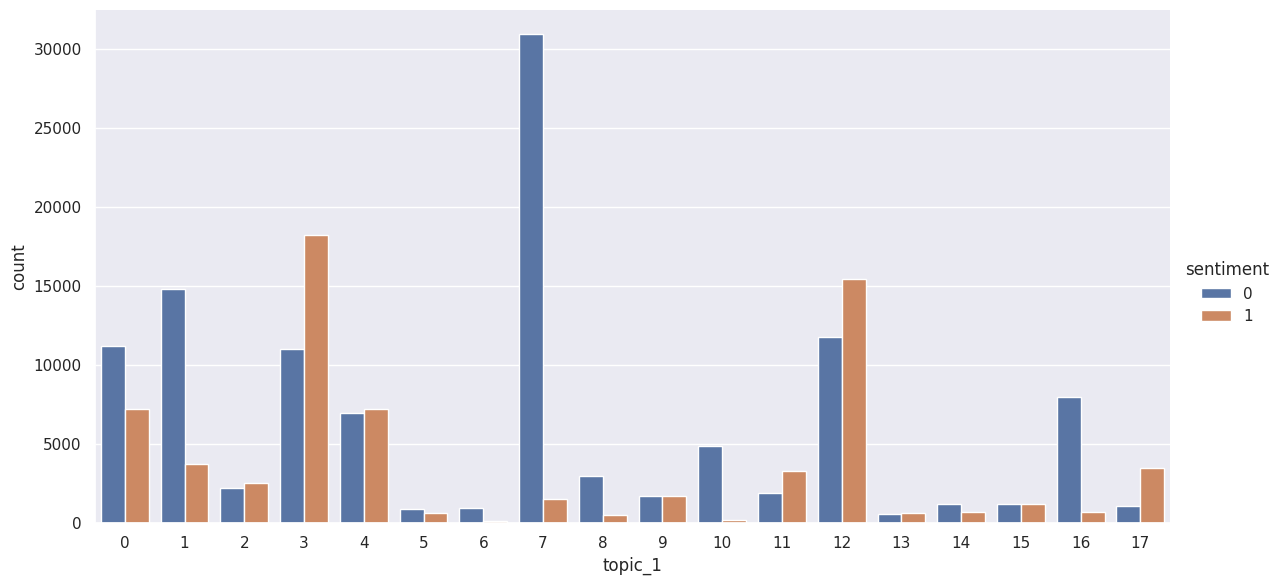

In [ ]:
# fg, ax = plt.subplots()
# fg.set_size_inches(11.7, 8.27)
sns.set(rc={'figure.figsize':(15,10)})
#plt.rcParams["figure.figsize"] = (18,10)
#plt.figure(figsize=(15,10))
plt.gcf().set_size_inches(11.7, 8.27)
fg = sns.factorplot(x='topic_1', y='count', hue='sentiment', data=senti, kind='bar', size=6, aspect=2)
fg.fig.set_dpi(100)
#fg.set_xlabels('')

In [ ]:
df.groupby(by=['sentiment'])['sentiment'].count()

sentiment
0    114242
1     69078
Name: sentiment, dtype: int64

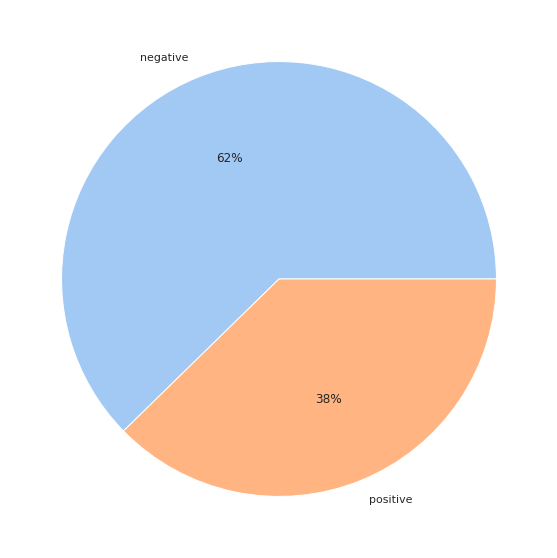

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = [114242, 69078]
labels = ['negative', 'positive']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

## Analyze based on LDA topic result

**Divide the text based on sentiment result and topic number. Then select the text with highest weight in each topic with each sentiment score. Calculate word frequencies to conclude insights from the top-related articles.**

In [6]:
import re # regular expressions
import os # Operation System
from datetime import datetime

import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import sys

import warnings
warnings.filterwarnings("ignore")

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
# Remove /n characters to avoid problems with analysis
df['text_new'] = df['text'].map(lambda x: re.sub(r'\n', '.  ', str(x)))

In [ ]:
topic = df[(df['topic_1'] == 3) & (df['w1'] >= 0.95)][['text_new', 'w1', 'sentiment']]
topic['sentiment'].value_counts()
#topic0.sort_values(by='w1', ascending=False).head(200)

1    5242
0    2089
Name: sentiment, dtype: int64

In [ ]:
topic_neg = topic[topic['sentiment'] == 0].sort_values(by='w1', ascending=False)
topic_neg = topic_neg.reset_index(drop=True)

In [ ]:
list(topic_neg['text_new'].unique())

In [ ]:
topic_neg.head(15)

,text_new,w1,sentiment
0,eMarketingSilo. Description We Are:. Accentu...,0.998017,0
1,eMarketingSilo. Marketing Operations Sales Ca...,0.998004,0
2,eMarketingSilo. Marketing Operations Sales Ca...,0.997999,0
3,eMarketingSilo. Description About JLL -. We'...,0.997998,0
4,eMarketingSilo. Description About JLL -. We'...,0.997984,0
5,FARMACEUTICALRX Closes $34.0 Million In Debt F...,0.997963,0
6,eMarketingSilo. Description Note: This role w...,0.997950,0
7,"REFI | 11 hours ago CHICAGO and PITTSBURGH, Fe...",0.997949,0
8,"CHICAGO and PITTSBURGH, Feb. 08, 2022 (GLOBE N...",0.997944,0
9,FARMACEUTICALRX Closes $34.0 Million In Debt F...,0.997940,0


In [ ]:
topic_pos = topic[topic['sentiment'] == 1].sort_values(by='w1', ascending=False)
topic_pos = topic_pos.reset_index(drop=True)

In [ ]:
topic_pos.tail(10)

In [ ]:
#flat_list = [item for sublist in topic_neg['text_new'] for item in sublist]
#str_result = ' '.join(topic_neg['text_new'])
str_result = ' '.join(topic_pos['text_new'])
words = nltk.tokenize.word_tokenize(str_result)

In [ ]:
## 4. Clean data: convert to lower case, remove stopwords, punctuation, numbers, etc
stopwords = set(nltk.corpus.stopwords.words('english'))

# Remove single-character tokens (mostly punctuation)
words = [word for word in words if len(word) > 1]

# Remove numbers
words = [word for word in words if not word.isnumeric()]

# Remove punctuation
words = [word for word in words if word.isalpha()]

# Lowercase all words (default_stopwords are lowercase too)
words_lc = [word.lower() for word in words]

# Remove stopwords
words_lc = [word for word in words_lc if word not in stopwords]

In [ ]:
## 5. Find top-10 tokens again
fdist_cleaned = nltk.FreqDist(words_lc)

#fdist.items() - will give all words
fdist_cleaned.most_common(50)

[('bears', 20229),
 ('chicago', 18399),
 ('game', 17283),
 ('season', 16918),
 ('bulls', 13197),
 ('games', 12152),
 ('first', 11987),
 ('two', 11843),
 ('team', 11676),
 ('last', 11621),
 ('one', 10863),
 ('points', 10703),
 ('illinois', 9426),
 ('said', 8348),
 ('three', 7758),
 ('four', 7214),
 ('win', 7091),
 ('get', 6795),
 ('free', 6698),
 ('also', 6662),
 ('new', 6641),
 ('year', 6623),
 ('big', 6538),
 ('second', 6479),
 ('time', 6439),
 ('back', 6387),
 ('play', 6128),
 ('teams', 6048),
 ('going', 5676),
 ('would', 5489),
 ('played', 5438),
 ('five', 5374),
 ('cubs', 5235),
 ('good', 5122),
 ('coach', 5110),
 ('poles', 5082),
 ('like', 5050),
 ('could', 5042),
 ('state', 4885),
 ('draft', 4797),
 ('players', 4588),
 ('nfl', 4535),
 ('best', 4477),
 ('make', 4372),
 ('white', 4370),
 ('made', 4349),
 ('sox', 4333),
 ('got', 4301),
 ('offensive', 4277),
 ('seasons', 4223)]

### Visualize some results

In [ ]:
res = fdist_cleaned.most_common(50)

In [ ]:
# for topic 3
res.remove(('first', 11987))
res.remove(('two', 11843))
res.remove(('one', 10863))
res.remove(('said', 8348))
res.remove(('three', 7758))
res.remove(('four', 7214))
res.remove(('second', 6479))
res.remove(('five', 5374))

In [ ]:
# for topic 12
res.remove(('said', 16880))
res.remove(('two', 4087))
res.remove(('one', 3940))
res.remove(('last', 2392))

In [ ]:
# for topic 7
res.remove(('one', 4028))
res.remove(('also', 2636))
#res.remove(('two', 2399))
res.remove(('first', 1450))
res.remove(('would', 2158))
res.remove(('according', 1913))

In [ ]:
word_list, freq = zip(*res)
word_list = list(word_list)
freq = list(freq)

In [ ]:
import wordcloud

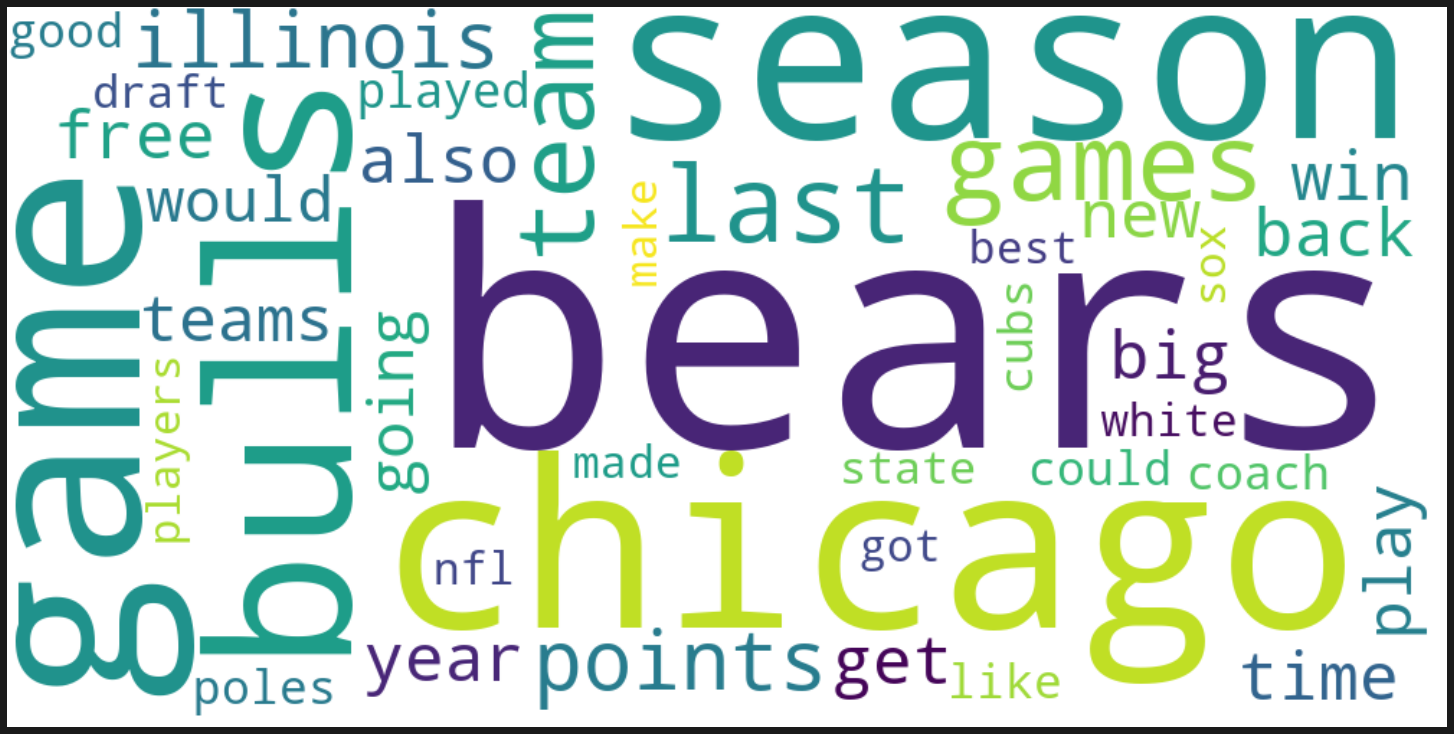

In [ ]:
# top_features_df_lg1 = coefs_with_fns_df_lg1.copy()
# top_features_df_lg1 ['coefficient'] = top_features_df_lg1 ['coefficient']*(10)

# data = dict(zip(top_features_df_lg1 ['feature'].tolist(), top_features_df_lg1 ['coefficient'].tolist()))
data = dict(zip(word_list, freq))

wordcloud_obj = wordcloud.WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    max_words=40,
    stopwords = wordcloud.STOPWORDS)

wordcloud_obj.generate_from_frequencies(data)

fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_obj, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Manually Filter out some Unrelated words

In [ ]:
result = []
for i in range(df.shape[0]):
  row = df.iloc[i]
  text = row['text_new']
  topic = row['topic_1']
  sentiment = row['sentiment']
  if ('policy' in text or 'policies' in text) and ('business' in text or 'businesses' in text): #and 'waste' not in text and 'garbage' not in text:
    result.append([text, topic, sentiment])

result = pd.DataFrame(result)

In [ ]:
res2 = []
for i in range(result.shape[0]):
  row = result.iloc[i]
  text = row['text']
  topic = row['topic']
  sentiment = row['sentiment']
  if 'tax' in text and ('roof' not in text and 'Rental' not in text and 'Description' not in text and 'Lawyers' not in text and 'mask' not in text): #and 'waste' not in text and 'garbage' not in text:
    res2.append([text, topic, sentiment])

res2 = pd.DataFrame(res2)

In [ ]:
res2.tail(20)

In [ ]:
result = result.rename(columns={0: 'text', 1:'topic', 2:'sentiment'})

In [ ]:
result.tail(10)

,text,topic,sentiment
2988,"May 4, 2022 River Forest, IL – The founder of ...",0,0
2989,Dumpster Rental Service Chicago IL. 1. A More...,2,0
2990,"[Monster of the Midway: The LanzaJet, Marquis ...",0,1
2991,The best Side of near me roofing company Chica...,4,1
2992,eMarketingSilo. Description Job Location: Chi...,0,0
2993,Table of Contents [See This Report about Illin...,4,0
2994,"Chicago Tribune | Feb 06, 2022 at 9:54 PM The ...",7,0
2995,First Chicago Insurance Company Review. First...,4,1
2996,In this chapter from her book describing five...,0,0
2997,A doctor chronicles life in a Chicago ER durin...,12,0


In [ ]:
result = []
for i in range(topic_neg.shape[0]):
  row = topic_neg.iloc[i]
  text = row['text_new']
  if 'stock' not in text: #and 'waste' not in text and 'garbage' not in text:
    result.append(text)

pd.DataFrame(result)

,0
0,Analysts forecast that Illinois Tool Works Inc...
1,Wall Street analysts expect that Illinois Tool...
2,Equities analysts expect Illinois Tool Works I...
3,Equities analysts forecast that Illinois Tool ...
4,Brokerages expect that Illinois Tool Works Inc...
5,Wall Street brokerages expect Illinois Tool Wo...
6,Wall Street analysts expect Illinois Tool Work...
7,Illinois Tool Works (NYSE:ITW) issued an updat...
8,Illinois Tool Works Inc. ( NYSE:ITW – Get Rati...


In [ ]:
result = []
for i in range(topic_pos.shape[0]):
  row = topic_pos.iloc[i]
  text = row['text_new']
  if 'divorce' not in text: #and 'job' not in text and 'Job' not in text and 'description' not in text:
    result.append(text)

pd.DataFrame(result).head(20)

,0
0,The 4-Minute Rule for Chicago Family Lawyer. ...
1,Divorce Lawyer Chicago Fundamentals Explained....
2,Not known Incorrect Statements About Chicago D...
3,Get This Report on Divorce Lawyers Chicago. T...
4,About Divorce Lawyers Chicago. The Ultimate G...
5,Chicago Divorce Attorneys for Dummies. All Ab...
6,All About Divorce Lawyer Chicago. Table of Co...
7,What Does Chicago Divorce Lawyer Mean?. The U...


### Plot sentiment change over time

In [ ]:
import matplotlib.pyplot as plt

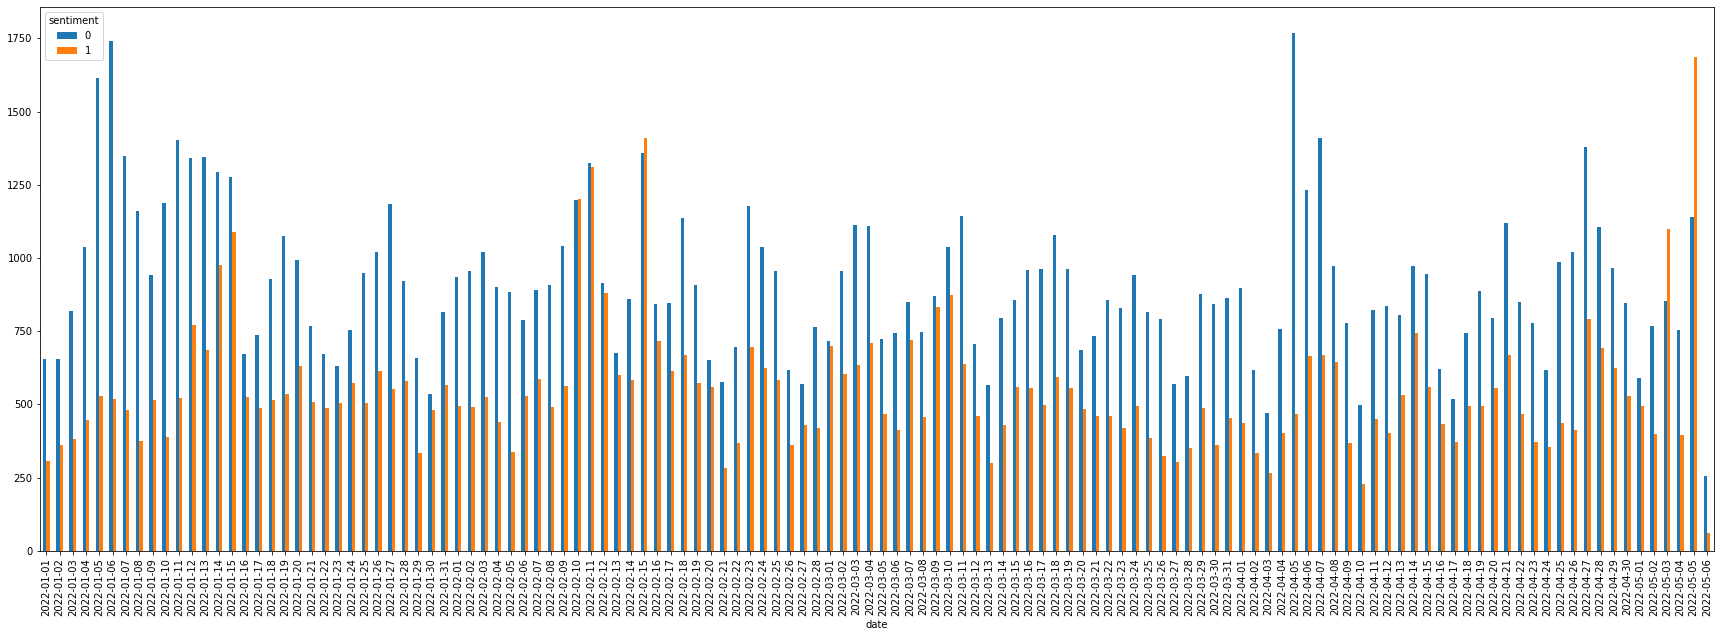

In [ ]:
#plt.figure(figsize=(20, 10), dpi=100)
fig, ax = plt.subplots(figsize=(30, 10))
pd.crosstab(df['date'],df['sentiment']).plot.bar(ax = ax)

In [ ]:
sentiment_count = pd.DataFrame(df.groupby(by=['date','topic_1', 'sentiment'])['sentiment'].count()).rename(columns={"sentiment": "count"}).reset_index()

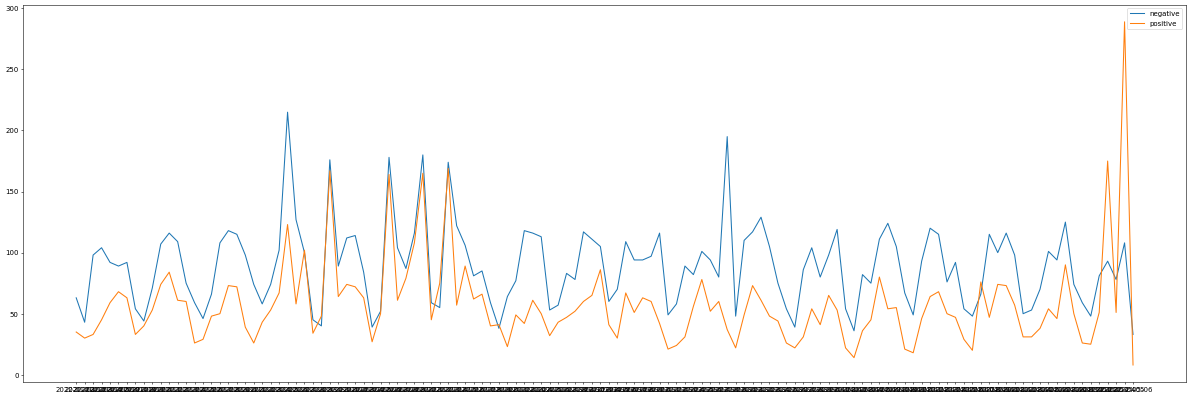

In [ ]:
plt.figure(figsize=(30, 10), dpi=50)
tmp = sentiment_count[(sentiment_count['topic_1'] == 0) & (sentiment_count['sentiment'] == 0)]
plt.plot(tmp['date'], tmp['count'], label = "negative")
tmp2 = sentiment_count[(sentiment_count['topic_1'] == 0) & (sentiment_count['sentiment'] == 1)]
plt.plot(tmp2['date'], tmp2['count'], label = "positive")
plt.legend()
plt.show()

In [ ]:
sentiment_count

,date,topic_1,sentiment,count
0,2022-01-01,0,0,63
1,2022-01-01,0,1,35
2,2022-01-01,1,0,79
3,2022-01-01,1,1,40
4,2022-01-01,2,0,8
...,...,...,...,...
4056,2022-05-06,12,1,22
4057,2022-05-06,14,0,1
4058,2022-05-06,15,1,1
4059,2022-05-06,16,0,6


In [ ]:
result = []

In [ ]:
i = 0
while i < sentiment_count.shape[0]:
  sentiment = ''
  date = sentiment_count.iloc[i]['date']
  neg = sentiment_count.iloc[i]['count']
  pos = sentiment_count.iloc[i+1]['count']
  if neg >= pos:
    sentiment = 'negative'
  else:
    sentiment = 'positive'

  result.append([date, sentiment])

  i = i + 2

In [ ]:
pd.DataFrame(result, columns = ['date', 'sentiment'])['sentiment'].value_counts()

negative    122
positive      4
Name: sentiment, dtype: int64

### Text Summarization

In [134]:
result = []
for i in range(df.shape[0]):
  row = df.iloc[i]
  text = row['text_new']
  topic = row['topic_1']
  sentiment = row['sentiment']
  if 'David Brown' in text:#'revenue' in text and 'eMarketingSilo.' not in text and 'description' not in text:
    result.append([text, topic, sentiment])

result = pd.DataFrame(result).rename(columns={0:"text", 1:"topic", 2:"sentiment"})

In [ ]:
result.head(10)

In [129]:
topic = df[(df['topic_1'] == 1) & (df['w1'] >= 0.95)][['text_new', 'w1', 'sentiment']]

In [130]:
topic_neg = topic[topic['sentiment'] == 0].sort_values(by='w1', ascending=False)
topic_neg = topic_neg.reset_index(drop=True)

In [ ]:
topic_neg.tail(10)

In [131]:
result = []
for i in range(topic_neg.shape[0]):
  row = topic_neg.iloc[i]
  text = row['text_new']
  #topic = row['topic_1']
  sentiment = row['sentiment']
  if 'storm' in text:#'revenue' in text and 'eMarketingSilo.' not in text and 'description' not in text:
    result.append([text, sentiment])

result = pd.DataFrame(result).rename(columns={0:"text", 1:"sentiment"})

In [132]:
result.head(10)

,text,sentiment
0,A cold front approaching the Chicago area gene...,0
1,"Live Snowstorm Updates: Snowfall Totals, Trave...",0
2,"Live Snowstorm Updates: Snowfall Totals, Trave...",0
3,People in the Northeast could see a foot of sn...,0
4,CHICAGO — Residents in Chicago and the surroun...,0
5,A storm system meteorologists had trouble pinn...,0
6,IE 11 is not supported. For an optimal experie...,0
7,"Chicago snowstorm sees more than 1,000 flights...",0
8,CHICAGO (CBS) — A High Wind Warning is in effe...,0
9,CHICAGO (WLS) -- The Chicago area could see th...,0


#### Food

In [126]:
text = str(result['text'][1])
text

'All about Chicago Style Thin Crust.  Indicators on Thin Crust Pizza In Denver You Should Know.  Table of Contents [Chicago Tavern-style Pizza Things To Know Before You Buy](#content-section-0) [Indicators on Best Thin Crust Denver You Need To Know](#content-section-1) [Facts About Thin Crust Pizza In Denver Uncovered](#content-section-2) [Best Thin Crust Denver Fundamentals Explained](#content-section-3) [Little Known Facts About Chicago Thin Crust In Denver.](#content-section-4) The dough is pushed up onto the sides of the frying pan, forming a bowl for an extremely thick layer of toppings. The thick layer of garnishes made use of in deep-dish pizza needs a longer baking time (commonly 30-45 minutes), which might shed cheese or various other garnishes if they were made use of as the top layer of the pizza..  [Chicago Tavern-style Pizza Things To Know Before You Buy].  [Indicators on Best Thin Crust Denver You Need To Know].  [Facts About Thin Crust Pizza In Denver Uncovered].  [Best 

In [127]:
%time ts.summarize(text)

CPU times: user 1.54 s, sys: 0 ns, total: 1.54 s
Wall time: 1.54 s


'The dough is pushed up onto the sides of the frying pan, forming a bowl for an extremely thick layer of toppings. Detroit-style pizza functions a thick and also crunchy crust with a bright red tomato sauce and also melty Wisconsin block cheese in a rectangle-shaped shape. Pizza makers often poke a little hole in the top of the "lid" to enable air and also steam to leave while cooking.'

#### Consulting service

In [112]:
text = str(topic_neg['text_new'][883])
text

"LONDON Hakluyt, the strategic advisory firm for businesses and investors, announced today that it has opened a new office in Chicago ..  This office, which will be Hakluyt's base in the Midwest, will be jointly led by Gretchen Crosby Sims and Tom Wyler . Gretchen joined Hakluyt in 2021, having previously spent 20 years in politics, policy, philanthropy and impact investing, including as executive director of the University of Chicago's Institute of Politics, director of Social Finance UK, and chief programme executive of the Joyce Foundation. Tom Wyler also joined the firm in 2021, having been senior vice president for global strategy at PSP Capital, a privately held investment firm headquartered in Chicago . He has also served as counsellor and senior adviser to the US Secretary of Commerce..   Varun Chandra , Hakluyt's managing partner, said: “I am proud that Hakluyt has opened a fourth office in the US, which continues to be one of our most important markets. Gretchen and Tom are b

In [113]:
%time ts.summarize(text)

CPU times: user 1.31 s, sys: 1.63 ms, total: 1.31 s
Wall time: 1.31 s


"Hakluyt, the strategic advisory firm for businesses and investors, announced today that it has opened a new office in Chicago. This office, which will be Hakluyt's base in the Midwest, will be jointly led by Gretchen Crosby Sims and Tom Wyler. Gretchen has spent 20 years in politics, policy, philanthropy and impact investing."

#### Casino

In [106]:
text = str(result['text'][0])
text

"Chicago is one step closer to a potential big revenue boost and achieving a goal that has eluded local mayors for decades: its first casino.Still, the project will have to clear major hurdles as Mayor Lori Lightfoot’s administration sorts through the proposals — which have been whittled down from five to three — and picks a winner.The three remaining bids advanced by the city may represent the path of least resistance for a Chicago casino. But none has landed without some objections or concerns, which the city may have to confront before it narrows the group down to a single favored plan, which officials said will be by early summer. It would still need to win state approval.A Chicago casino study in summer 2019 pointed to the merits of a downtown location close to hotels and other attractions, instead of in outlying neighborhoods that out-of-towners with money to spend might deem unsafe. But the same study also argued that the project could fail to attract developers because the orig

In [107]:
%time ts.summarize(text)

CPU times: user 1.25 s, sys: 0 ns, total: 1.25 s
Wall time: 1.25 s


'Mayor Lori Lightfoot plans to select the operator and location of a Chicago casino in “early 2022,” officials said. The city, which is banking on a casino to generate $200 million in annual tax revenue to plug its public pension funding holes, plans to submit its choice to the Illinois Gaming Board.'

#### Entertainment & Food

In [100]:
text = str(result['text'][1])
text

'13 Hidden Chicago Speakeasies with Secret Doors + Fun Cocktails.  Whether you are heading to the big brilliant city of Chicago for business or pleasure you will definitely want to experience Chicago nightlife..  We’ve done the legwork and the sampling for you and uncovered 13 Hidden Chicago Speakeasies, where you’ll find everything from secret doors to fun cocktails or you might say, the best secret bars in Chicago!.  Why You’ll Love The Secret Bars In Chicago.  - The list of speakeasies in Chicago gives you a well-rounded 13 hidden bars to choose from.  - Wicker Park Bars (secret bars) are located on this list as well and the area is just fun!.  - Fantastic bars in the Loop (that you might not have considered).  - The Actual speakeasy bar names in Chicago and links to you can find more details!.  - A suggestion to find out the best way to get to each of these hidden drinking dens.  From the gleaming reflection of the southwestern shores of Lake Michigan as far as the eye can see, you

In [101]:
%time ts.summarize(text)

CPU times: user 1.42 s, sys: 0 ns, total: 1.42 s
Wall time: 1.41 s


'13 Hidden Chicago Speakeasies with Secret Doors + Fun Cocktails. Whether you are heading to the big brilliant city of Chicago for business or pleasure you will definitely want to experience Chicago nightlife. Use the Rome2rio website or app to help you navigate and plan your routes to any of the listed secret entrance speakeasie in Chicago.'

#### Sports

In [94]:
text = str(result['text'][0])
text

'Chicago Bears general manager Ryan Poles has completed his first draft class — and it’s much bigger than originally planned..  After drafting two defensive backs and a wide receiver in the second round Friday, Poles engineered four trades Saturday to increase his Day 3 picks from three to eight..  The Bears ended the weekend with 11 newly drafted players, including four offensive linemen, an edge rusher, a running back, a safety and a punter..  Bears undrafted free-agent tracker : GM Ryan Poles adds several WRs and DBs on deals or minicamp invites Column: Ryan Poles makes several moves on Day 3 of the draft with eyes on improving the Bears offensive line How a flurry of trades by new GM Ryan Poles gave the Bears more swings in the NFL draft Bears are set to release Nick Foles after being unable to find a taker for the former Super Bowl MVP Column: GM Ryan Poles didn’t talk too much about fixing the Bears’ secondary — but it was a glaring need Bears prioritize defense , selecting Kyler

In [95]:
%time ts.summarize(text)

CPU times: user 1.36 s, sys: 0 ns, total: 1.36 s
Wall time: 1.35 s


'Bears GM Ryan Poles has completed his first draft class. Poles engineered four trades Saturday to increase his Day 3 picks from three to eight. The Bears ended the weekend with 11 newly drafted players, including four offensive linemen, an edge rusher, a running back, a safety and a punter.'

#### Abortion

In [88]:
text = str(result['text'][0])
text

'Local leaders from both sides of the aisle are weighing in after an apparent draft opinion indicating the U.S. Supreme Court could overturn the Roe v. Wade abortion case was leaked by Politico Monday night..  The document is not a final decision, but a "first draft" of the opinion in a case challenging Mississippi\'s ban on abortions after 15 weeks ..  Chief Justice John Roberts confirmed the leak of a draft opinion overturning Roe v. Wade, authored by Justice Samuel Alito, is genuine. The news set off a firestorm in America..  Chief Justice John Roberts confirmed Tuesday the authenticity of the leaked draft opinion and ordered an investigation into what he called an "egregious breach of trust.".  Governor JB Pritzker condemned the report Tuesday that could allow states to enact even more restrictive anti-choice laws that would deny a woman\'s access to reproductive health care..  Governor JB Pritzker spoke out against a leaked Supreme Court draft opinion on abortion..  "We were warne

In [89]:
%time ts.summarize(text)

CPU times: user 1.32 s, sys: 1e+03 µs, total: 1.32 s
Wall time: 1.32 s


'Chief Justice John Roberts confirmed Tuesday the authenticity of the leaked draft opinion. Illinois Governor JB Pritzker condemned the report that could allow states to enact even more restrictive anti-choice laws. The document is not a final decision, but a "first draft" of the opinion in a case challenging Mississippi\'s abortion ban.'

#### Marijuana

In [78]:
text = str(result['text'][0])
text

'Content.  - [Missing Out On As Well As Worth Millions: Tweezed From The Moon, Loads Of Lunar Rocks Have Actually Gone Away - moon rocks for sale].  - [Cbd American Shaman - moon rocks for sale florida].  - [Cbd Farmhouse Delta 8 Moon Rocks].  - [Meteorite Moon Rock Gift - moon rocks for sale massachusetts].  - [Moon Rock Carts:].  - [Bearly Lawful Hemp D8 Moon Rocks - moon rocks for sale in illinois].  Cbd American Medicine Man - moon rocks for sale chicago.  Marijuana is actually one of the earliest agricultural plants in the world. Using cannabis crops has actually placed a point to the nomadic lifestyle and also has produced farming human beings. For centuries, middle ages and also ancient cultures have cultivated cannabis and used it for both medical, leisure, as well as religious functions. In spite of the prohibition towering above the cannabis coming from 1930s to 2018, individuals are actually currently finding its own healing buildings, and also the psychedelic high of weed h

In [79]:
%time ts.summarize(text)

CPU times: user 1.24 s, sys: 0 ns, total: 1.24 s
Wall time: 1.23 s


'Moon rocks are actually a THC megazord: They are cannabis buddies dipped in hash oil, then turned in kief. Depending on where you acquire, you can obtain moon rocks from $19 as much as $3,000. Moon stones are encouraged for experiences as individuals as they load a strong strike.'

#### COVID

In [69]:
text = str(result['text'][2])
text

'.  Illinois health officials reported 24,646 new COVID-19 cases over the past week, along with 46 additional deaths. That’s an increase in cases, but a decrease in deaths from this time last week..  The previous week, the state reported 19,551 new and 58 deaths. The week before that, the state reported 14,049 new cases and 45 deaths were reported..  In all, 3,138,682 cases of coronavirus have been reported in the state since the pandemic began, according to the latest data from the Illinois Department of Public Health. The additional deaths bring the state to 33,614 confirmed COVID fatalities..  Over the past seven days, the state’s weekly vaccination average dropped to 15,913 doses, per IDPH data. Since last Friday, 111,391 doses were administered across the state..  More than 21 million vaccine doses have been administered in Illinois since vaccinations began in December 2020. More than 68% of Illinois residents are fully vaccinated against COVID-19, with more than 76% receiving at 

In [70]:
%time ts.summarize(text)

CPU times: user 1.11 s, sys: 834 µs, total: 1.12 s
Wall time: 1.11 s


'Illinois health officials reported 24,646 new COVID-19 cases over the past week. That’s an increase in cases, but a decrease in deaths from this time last week. In all, 3,138,682 cases of coronavirus have been reported in the state since the pandemic began.'

#### Politics

In [56]:
text = str(result['text'][0])
text

'Former Illinois House Speaker Michael Madigan Indicted Posted on March 2, 2022 by Chicago 1 Chicago Chicago News & Search 1 News - 1 eMovies - 1 eMusic - 1 eBooks - 1 Search Search for: Former Illinois House Speaker Michael Madigan has been indicted on federal corruption charges. '

In [57]:
%time ts.summarize(text)

CPU times: user 941 ms, sys: 8.28 ms, total: 949 ms
Wall time: 948 ms


'Former Illinois House Speaker Michael Madigan Indicted. Madigan has been indicted on federal corruption charges. He was speaker of the Illinois House of Representatives from 1997 to 2011. He is accused of misusing his position as speaker to advance his political career. He has denied the allegations.'

#### Crime

In [46]:
text = str(topic_neg['text_new'][1])
text

'CHICAGO - The Chicago police officer who fatally shot 13-year-old Adam Toledo in Little Village last year will not face criminal charges, Cook County State\'s Attorney Kim Foxx announced at a news conference Tuesday..  The officer who killed 22-year-old Anthony Alvarez in a shooting on the Northwest Side just days later also will not be charged, Foxx said..  Nearly a year after the shootings, prosecutors concluded that they could not meet the necessary burden of proof to bring charges, Foxx said during what she called a "somber announcement.".  "There are no winners in this very tragic situation," she said..  In keeping with policy, the office of the Illinois State\'s Attorneys Appellate Prosecutor also reviewed the cases and agreed that the officers should not be charged, Foxx said..  Toledo was the youngest person to be fatally shot by Chicago police in years. His death sparked an outcry that only intensified after the release of graphic footage from body-worn cameras and surveillan

In [47]:
%time ts.summarize(text)

CPU times: user 1.47 s, sys: 1.82 ms, total: 1.47 s
Wall time: 1.47 s


"NEW: Adam Toledo's family files a wrongful-death lawsuit against the city and the officer. NEW: Attorney for Toledo family says they will contact the U.S. Department of Justice. The officer who fatally shot 13-year-old Adam Toledo will not be charged, state's attorney says. Officer who killed Anthony Alvarez, 22, will also not face charges, she says."

#### Climate

In [45]:
text = str(result['text'][0])
text

"A cold front approaching the Chicago area generated showers and thunderstorms, with a severe thunderstorm warning and power outages occurring as a result of those storms..  Here's how the storms unfolded in real-time:.  A line of thunderstorms swept through the Chicago area on Wednesday afternoon, bringing with it heavy rain and gusty winds that left nearly 4,000 utility customers without power..  According to ComEd, at least 3,500 customers were left without power as of 6 p.m. Wednesday due to high winds and severe storms that swept through the area..  A cold front propelling the storms is expected to bring cooler-than-average temperatures along with it late Wednesday, but the winds will likely stick around even after the system departs the region, with a wind advisory remaining in effect through Thursday evening..  The line of storms didn’t pack the severe punch that some initial forecasts had predicted, with showers and storms during the morning hours likely stabilizing the atmosph

In [37]:
%time ts.summarize(text)

CPU times: user 1.64 s, sys: 22.4 ms, total: 1.66 s
Wall time: 1.79 s


'A cold front approaching the Chicago area generated showers and thunderstorms, with a severe thunderstorm warning and power outages occurring as a result of those storms. At least 3,500 customers were left without power as of 6 p.m. Wednesday due to high winds and severe storms that swept through the area. A cold front propelling the storms is expected to bring cooler-than-average temperatures along with it late Wednesday.'

#### Education

In [ ]:
text = str(df['text_new'][1])
text

'CHICAGO (AP) — Chicago school leaders canceled classes for a second straight day after failing to reach an agreement Wednesday with the teachers union over remote learning and other COVID-19 safety protocols in the nation\'s third-largest school district. The Chicago Teachers Union, which voted to revert to online instruction, told teachers to stay home Wednesday during the latest COVID-19 surge while both sides negotiate, prompting district officials to cancel classes two days after students returned from winter break. Chicago Public Schools, like most other districts, has rejected retuning to remote learning, saying it worsened racial inequities and was detrimental to academic performance, mental health and attendance. District officials insist schools can safely remain open with protocols in place. Both sides negotiated behind closed doors Wednesday afternoon but failed to produce an agreement. The issues include metrics that would trigger school closures and more COVID-19 testing.

In [ ]:
%time ts.summarize(text)

CPU times: user 24.2 s, sys: 203 ms, total: 24.4 s
Wall time: 24.9 s


'Chicago school leaders cancel classes for a second straight day after failing to reach an agreement with the teachers union. The issues include metrics that would trigger school closures and more COVID-19 testing. Chicago Public Schools has rejected retuning to remote learning, saying it worsened racial inequities. District officials insist schools can safely remain open with protocols in place.'